## tf 2.12.0(>=2.9.0) 사용
- 모델 저장 후 불러오기 할 때 2.9.0 이하 버전은 제대로 진행되지 않을 수 있음

In [1]:
import tensorflow as tf
tf.__version__

'2.10.1'

# 신경망 모델 훈련

## 손실 곡선
- 사잇킷런 알고리즘 : 모델의 구조가 어느 정도 고정되어 있음
- 케라스 알고리즘 : 모델의 구조를 직접 만드는 느낌이 강함
- 모델의 코드셀은 print()명령을 사용하지 않더라도 마지막 라인 실행결과를 자동으로 출력
    - 즉 반환되는 결과가 있다는 의미
    - 케라스의 fit()메서드는 History 클래스 객체를 반환 함
- History 클래스 객체
    - 훈련과정에서 계산한 지표, 즉, 손실도 정확도 값이 저장되어 있음
    - 이 값을 사용하여 그래프를 그리면 손실곡선을 그릴 수 있음    

In [1]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용
import tensorflow as tf
tf.random.set_seed(42)
from tensorflow import keras
import pickle # 모델 압축 저장할 때 사용
from keras.datasets import mnist
# 저장 되는 파일의 압축 방법중 하나를 구현한 클래스(pkl 압축)
# 파이썬에서 클래스 객체 변수 그대로 저장하려고 할때(numpy 객체, 판다스 객체등)
# 머신러닝 모델 저장용
# 딥러닝 모델의 가중치 저장용
from sklearn.model_selection import train_test_split

In [2]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = mnist.load_data()


In [3]:
from sklearn.model_selection import train_test_split

train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [4]:
# 모델을 구성하는 함수 생성
# 기본 flatten 층과 1개의 은닉층 출력층으로 구성하고
# 매개변수로 a_layer가 전달되면 은닉층을 추가해서 모델을 구성해주는 함수
def model_create(m_layer = None) :
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape = (28, 28)))
    model.add(keras.layers.Dense(100, activation = 'relu'))
    if m_layer : # 만약 함수 호출 시 전달되는 모델 층이 있으면 추가
        model.add(m_layer)
    model.add(keras.layers.Dense(10, activation = 'softmax'))
    return model


In [5]:
model = model_create()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
# verbose=0으로 지정하면 훈련과정을 출력하지 않음
# 출력 대신에 history 변수에 저장
history = model.fit(train_scaled, train_target, epochs = 5, verbose = 0)

In [7]:
history.history

{'loss': [0.2961118817329407,
  0.14317606389522552,
  0.10260730981826782,
  0.08239196985960007,
  0.06749092787504196],
 'accuracy': [0.9163541793823242,
  0.9587916731834412,
  0.9696041941642761,
  0.9756875038146973,
  0.9798333048820496]}

- 케라스는 매 epochs마다 손실을 계산하고 평가지표(metric)를 계산함

In [8]:
history.history['loss']

[0.2961118817329407,
 0.14317606389522552,
 0.10260730981826782,
 0.08239196985960007,
 0.06749092787504196]

In [9]:
history.history['accuracy']

[0.9163541793823242,
 0.9587916731834412,
 0.9696041941642761,
 0.9756875038146973,
 0.9798333048820496]

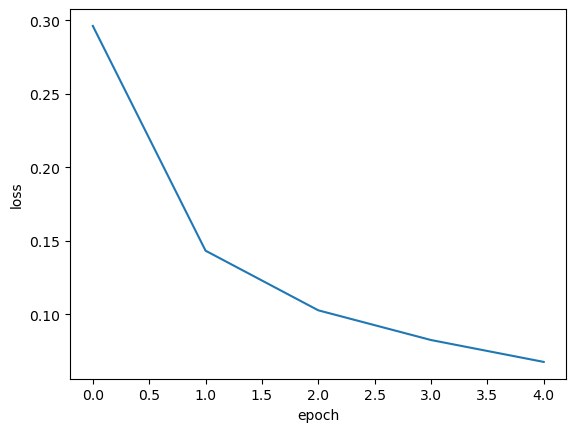

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.savefig('loss_1.jpg', dpi=300)
plt.show()

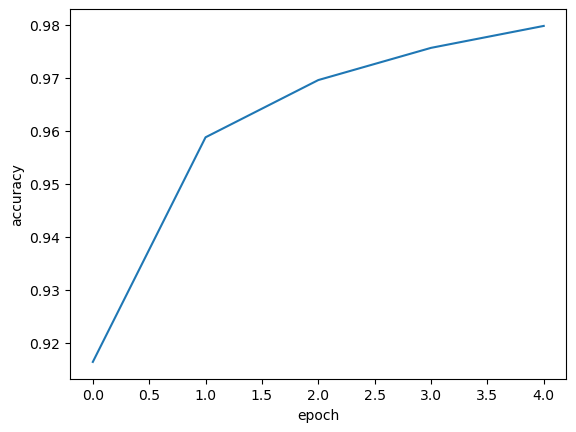

In [11]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.savefig('accuracy.jpg', dpi=300)
plt.show()

**epoch 마다 손실을 감소하고 정확도가 증가함**
- epoch를 늘려볼 필요가 있어보임

In [12]:
model = model_create() # 입력/은닉/출력 층
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
# epochs를 20으로 증가
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

In [13]:
history.history['loss']
# history.history['accuracy']

[0.29841148853302,
 0.14135776460170746,
 0.10311329364776611,
 0.08300727605819702,
 0.06866340339183807,
 0.057174477726221085,
 0.05094767361879349,
 0.043995920568704605,
 0.039302267134189606,
 0.03467492386698723,
 0.0310012586414814,
 0.02715221606194973,
 0.02464212477207184,
 0.020912524312734604,
 0.01849276013672352,
 0.016744257882237434,
 0.015267685055732727,
 0.012689586728811264,
 0.011823911219835281,
 0.009367872029542923]

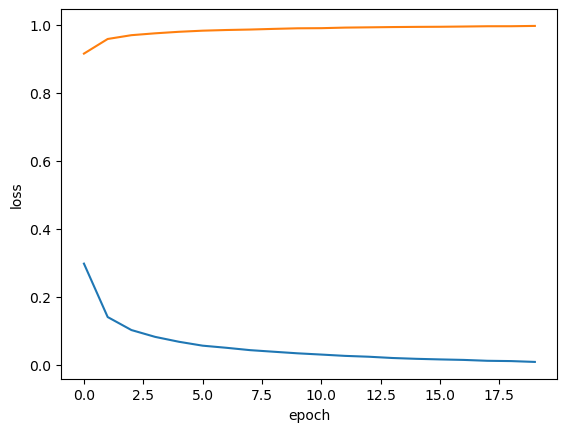

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.savefig('loss2', dpi=300)
plt.show()

- epoch를 늘릴수록 손실은 감소하고 정확도는 증가함
    - but, 고려해야 할 상황이 있음. 
    - epoch를 늘린다는건 그만큼 반복학습을 진행한다는 말이므로 과대적합의 가능성을 고려해야 함
        - epoch의 수는 과소/과대 적합과 관련이 있음

## 검증 손실
- 과대/과소 적합을 파악하기 위해 훈련세트에대한 점수 뿐만이 아니라 검증세트에 대한 점수도 필요
- 손실을 이용하여 과대/과소 적합을 확인
- **인공 신경망 모델이 최적화 하는 대상은 정확도가 아니라 손실함수 임**
    - 손실감소에 비례하여 정확도가 높아지지 않는 경우도 있음. 기준을 정확도가 아닌 손실함수에 두고 판단해야 함
    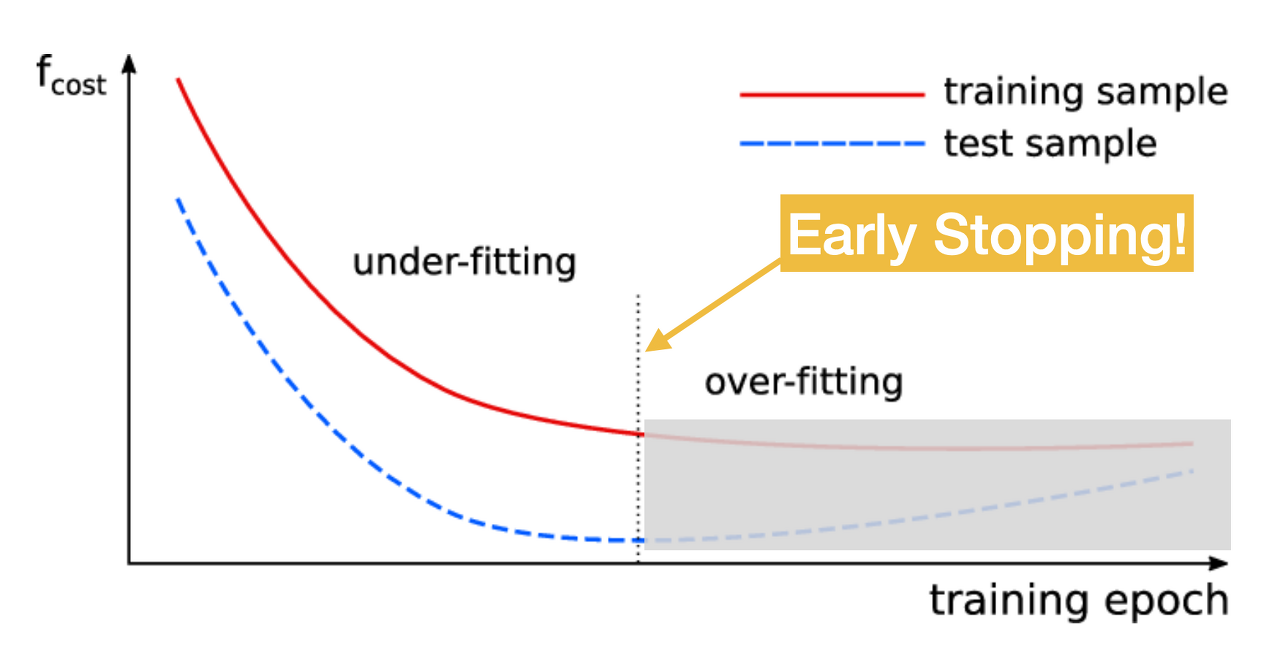
    - 그림 원본: https://c11.kr/r6g5

### 신경망 모델의 검증 데이터
- fit(validation_data=(val_X, val_y))
    - 학습 시 val 데이터 이용해서 에포크별 검증도 진행

In [19]:
model = model_create()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
# 에포크 증가 및 검증 데이터 추가
history = model.fit(train_scaled, train_target,
                  epochs = 20,
                  verbose = 1,
                  validation_data = (val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2966 - accuracy: 0.9164 - val_loss: 0.1882 - val_accuracy: 0.9454
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1452 - accuracy: 0.9576 - val_loss: 0.1293 - val_accuracy: 0.9622
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1056 - accuracy: 0.9694 - val_loss: 0.1146 - val_accuracy: 0.9652
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0843 - accuracy: 0.9751 - val_loss: 0.1065 - val_accuracy: 0.9683
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0708 - accuracy: 0.9800 - val_loss: 0.1119 - val_accuracy: 0.9678
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0599 - accuracy: 0.9825 - val_loss: 0.1052 - val_accuracy: 0.9696
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0522 - accuracy: 0.9853 - val_loss: 0.0971 - val_accuracy:

In [20]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


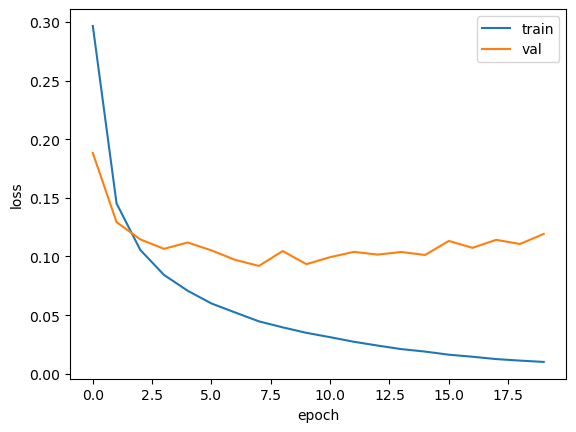

In [21]:
plt.plot(history.history['loss']) # 훈련손실값
plt.plot(history.history['val_loss']) # 검증손실값
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('t_v.jpg', dpi=300)
plt.show()

- 초기에 검증손실이 감소하다가 3-4 사이에증가 후 7정도에서 한번 더 감소 후 다시 증가세를 보임
    - 실행결과는 달라질 수 있음
- 훈련 손실을 꾸준히 감소하고 있는 중 이기 때문에 전형적인 과대 적합 모형이 일정 epoch 이후 나타남
- 목표는 검증손실이 증가하는 시점을 최대한 뒤로 미루는 것

In [22]:
# optimizer를 adam으로 변경 후 확인
model = model_create()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy',
             optimizer = 'adam')
# 에포크 증가 및 검증 데이터 추가
history = model.fit(train_scaled, train_target,
                  epochs = 20,
                  verbose = 1,
                  validation_data = (val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2969 - accuracy: 0.9166 - val_loss: 0.1771 - val_accuracy: 0.9482
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1425 - accuracy: 0.9584 - val_loss: 0.1308 - val_accuracy: 0.9621
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0979 - accuracy: 0.9720 - val_loss: 0.1111 - val_accuracy: 0.9671
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0758 - accuracy: 0.9773 - val_loss: 0.0956 - val_accuracy: 0.9701
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0583 - accuracy: 0.9821 - val_loss: 0.1033 - val_accuracy: 0.9691
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0472 - accuracy: 0.9852 - val_loss: 0.1010 - val_accuracy: 0.9698
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0392 - accuracy: 0.9883 - val_loss: 0.0918 - val_accuracy:

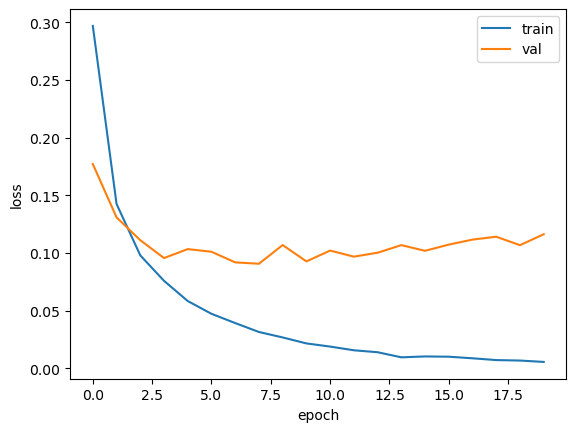

In [23]:
# 옵티마이저 : adam 사용시 손실값 비교
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('t_v.jpg', dpi=300)
plt.show()

- 등락이 있기는 하지만 10번째 에포크 정도에서 한번 더 감소한걸로 보여진다

## 드롭아웃

- 훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 끔(출력을 0으로 만듬)으로써 일반화 시켜 과대적합을 막는 방법
- 샘플들마다 다른(랜덤하게) 뉴런을 끔
- 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있으므로 모든 입력에 주의를 기울이게 됨


### keras.layers.Dropout(뉴런비율:0-1)
- 규제를 위한 층 : 파라미터인 뉴런비율은 0.3 기본값

In [24]:
# 드롭아웃 층 추가
model = model_create(keras.layers.Dropout(0.3))

In [25]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target))

- 모델의 훈련이 끝나고 예측 평가를 진행할 때는 drop-out을 적용하지 말아야 함
    - 그래야 훈련된 모든 뉴런을 이용해 예측을 진행 할 수 있음
    - 케라스는 예측 평가시(evaluation)에서 drop-out을 자동으로 적용시키지 않는다
        - evaluation은 predict에 해당됨(test 데이터로 사용)

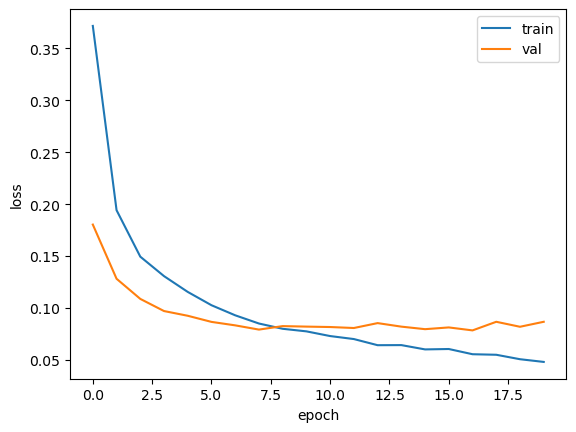

In [29]:
# drop-out 층 추가 모델, 옵티마이저 adam
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('drop.jpg', dpi=300)
plt.show()

- 과대 적합이 확실히 줄었음
    - 10번째 에포트 정도에서 검증 손실의 감소가 멈추지만 크게 상승하지 않고 어느정도 유지됨

## 드롭아웃 규제 특징
- 과대적합 방지
- 신경망층에서 dropout 추가 : drop 아웃층은 어디든 상관없음
    - 은닉층에 뒤에 추가
- Improving neural networks by preventing co-adaptation of feature 논문에 따르면 은닉층이 많을경우 dropout이 많은 모델일 수록 loss 증가를 막는 연구가 있음
    - 단 dropout은 너무 많으면 속도가 급격히 느려진다
        - 그러므로 많은 차이가 없으면 은닉층에 한 두번 추가하는 것이 일반적임

## 모델 저장과 복원
- 위 모델은 20번 반복 훈련 했기 때문에 어느정도 과대적합되어 있음
    - 에포크 횟수를 10으로 하고 다시 훈련해볼 필요가 있음

In [31]:
model = model_create(keras.layers.Dropout(0.3)) # 30프로 뉴런을 끄게됨(기본값)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=10, verbose=0, 
                    validation_data=(val_scaled, val_target))

- 훈련된 모델의 **파라미터를 저장**하려면
    - save_weights()함수 사용
    - 파일 확장자에 따라 저장되는 형태가 다름
        - 보통 HDFS 형식으로 저장함
        - HDFS : HaDoop File System(XX.h5)
- 훈련된 모델의 구조와 파라미터를 저장하려면
    - save()
        - HDFS : 확장자 h5 로 나타남

In [86]:
# 훈련된 모델 파라미터 저장
model.save_weights('model-weights.h5')

In [90]:
# 훈련된 모델 구조와 파라미터 저장
# save()
model.save('C:/model-whole.h5')

PermissionError: [Errno 13] Unable to create file (unable to open file: name = 'C:/model-whole.h5', errno = 13, error message = 'Permission denied', flags = 13, o_flags = 302)

- 파일 저장 확인

#### 저장된 모델 파라미터 이용하여 모델 복원
- 모델 구조는 저장되지 않음
    - 모델의 구조는 알고 있어야 함
- load_weight()

In [57]:
# 새로운 모델을 만들고 기존에 훈련시켜놓은 모델에서 저장한 파라미터를 로드시켜 새 모델에 적용
model = model_create(keras.layers.Dropout(0.3))

In [58]:
# 모델 load
model.load_weights('model-weights.h5')

In [62]:
val_scaled.shape

(12000, 28, 28)

In [63]:
# 저장된 파라미터 반영 predict
# evaluation()테스트 데이터 활용해서 모델 성능을 확인
# predict() : 예측 확률을 넘겨주는 함수
prd = model.predict(val_scaled)

375/375 [==============================] - 1s 1ms/step


In [64]:
prd.shape

(12000, 10)

In [65]:
prd[0]

array([1.6258481e-08, 2.5318632e-09, 4.1339258e-06, 6.8436080e-04,
       2.0500847e-08, 2.8220933e-05, 1.5616109e-11, 9.9783665e-01,
       3.2813480e-06, 1.4434642e-03], dtype=float32)

In [66]:
import numpy as np
# 확률로 반환 된 값에서 가장 큰 확률값을 갖는 원소의 인덱스 반환
val_labels = np.argmax(prd, axis = -1)
val_labels

array([7, 3, 8, ..., 9, 7, 2], dtype=int64)

In [67]:
# 예측 라벨과 타겟이 얼마나 같은 지 확인 후 평균 계산
np.mean(val_labels == val_target)

0.9763333333333334

### 저장된 모델을 읽어와서 모델을 이용한 평가
- 모델의 구조와 가중치가 저장된 파일 읽어오기
    - load_model(파일명)

In [89]:
# keras.models.load_model('모델경로 및 모델명')
model = keras.models.load_model('c:model-whole.h5')
# 'utf-8' codec can't decode byte 0xec in position 32: invalid continuation byte
# 모델저장 경로에 한글이 포함되어 있어서 발생하는 에러

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 32: invalid continuation byte

In [75]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [76]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.0826 - accuracy: 0.9763


[0.08255849778652191, 0.9763333201408386]

### 결과
- 두 모델은 같은 모델임 : 동일한 모델의 파라미터를 사용하고 있음
    - 정확도의 결과도 동일함

## 콜백
- 위 예제는 20번의 에포크동안 모델을 훈련하여 검증 점수가 상승하는 지점을 확인한 후 다시 그 지점까지 다시 훈련하는 방법을 사용함
    - 모델을 다시 훈련하지 않고 한번에 끝내려면????
- 콜백은 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체
    - 프로그램 진행 중에 다른 프로그램을 호출하는 개념
        - 현재 프로그램은 실행하면서 다른 프로그램도 실행되어야 함
            - backe end에서 진행
    - fit()메서드에 callbacks 매개변수에 리스트로 전달하여 사용
- keras.callbacks.ModelCheckpoint() : 최상의 검증 점수를 낸 모델이 저장(베스트 파라미터 모델과 같은 개념)

In [78]:
# 모델생성
model = model_create(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [82]:
# 체크포인트 생성(콜백함수)
# 베스트모델을 저장해 줌
cb = keras.callbacks.ModelCheckpoint('best-model.h5')
#ModelCheckpoint 객체 인스턴스 생성
# 모델학습(콜백적용)
model.fit(train_scaled, train_target, epochs = 20, verbose = 1,
         validation_data = (val_scaled, val_target),
         callbacks = [cb])

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3801 - accuracy: 0.8882 - val_loss: 0.1764 - val_accuracy: 0.9511
Epoch 2/20
  78/1500 [>.............................] - ETA: 2s - loss: 0.2168 - accuracy: 0.9427

C:\Anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 3s 2ms/step - loss: 0.1969 - accuracy: 0.9421 - val_loss: 0.1365 - val_accuracy: 0.9594
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1547 - accuracy: 0.9537 - val_loss: 0.1107 - val_accuracy: 0.9677
Epoch 4/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1317 - accuracy: 0.9612 - val_loss: 0.0998 - val_accuracy: 0.9703
Epoch 5/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1149 - accuracy: 0.9645 - val_loss: 0.0975 - val_accuracy: 0.9716
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1008 - accuracy: 0.9685 - val_loss: 0.0883 - val_accuracy: 0.9755
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0965 - accuracy: 0.9705 - val_loss: 0.0836 - val_accuracy: 0.9760
Epoch 8/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0890 - accuracy: 0.9715 - val_loss: 0.0843 - val_accuracy: 0.9768
Epo

In [84]:
# 저장된 best-model을 로드하여 평가진행
model = keras.models.load_model('best-model.h5')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xec in position 32: invalid continuation byte

In [ ]:
model.evaluate(val_scaled, val_target)

- 다시 학습 하지 않기 때문에 훨씬 간편함
    - but, 10번 정도에서 최적의 모델을 찾았음에도 20번까지 학습해야 함
    - 조기종료 사용 훈련 중지
- 조기종료 : 학습을 일찍 중지하여 과대적합을 방지하는 기법

#### early-stopping callback
- keras.callbacks.EarlyStopping(patience=n,restore_best_weights=True)
- 조기종료 콜백
- patience 매개변수를 활용
- ex. patience=2 로 지정하면 2번 연속 검증 점수가 향상되지 않으면 훈련을 중지
- restore_best_weights=True 로 지정하면 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌림
    - 최적 모델에서 몇번 더 훈련을 진행하므로 가중치를 저장하려면 파라미터를 되돌릴 필요가 있음

In [93]:
model = model_create(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

# 체크포인트객체 생성
cb = keras.callbacks.ModelCheckpoint('best-model.h5')
# 조기종료 객체 생성
early_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)

model.fit(train_scaled, train_target, epochs = 20, verbose = 1,
         validation_data = (val_scaled, val_target),
         callbacks = [cb, early_cb])

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3659 - accuracy: 0.8932 - val_loss: 0.1775 - val_accuracy: 0.9495
Epoch 2/20
  72/1500 [>.............................] - ETA: 3s - loss: 0.2136 - accuracy: 0.9362

C:\Anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 3s 2ms/step - loss: 0.1936 - accuracy: 0.9422 - val_loss: 0.1304 - val_accuracy: 0.9617
Epoch 3/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1499 - accuracy: 0.9561 - val_loss: 0.1075 - val_accuracy: 0.9668
Epoch 4/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1301 - accuracy: 0.9603 - val_loss: 0.0984 - val_accuracy: 0.9697
Epoch 5/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1134 - accuracy: 0.9647 - val_loss: 0.0952 - val_accuracy: 0.9704
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0997 - accuracy: 0.9691 - val_loss: 0.0870 - val_accuracy: 0.9730
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0928 - accuracy: 0.9706 - val_loss: 0.0884 - val_accuracy: 0.9740
Epoch 8/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0861 - accuracy: 0.9729 - val_loss: 0.0832 - val_accuracy: 0.9748
Epo

In [94]:
# early_stopping_cb.stopped_epoch 언제 종료되었는지를 저장한 속성
early_cb.stopped_epoch

12

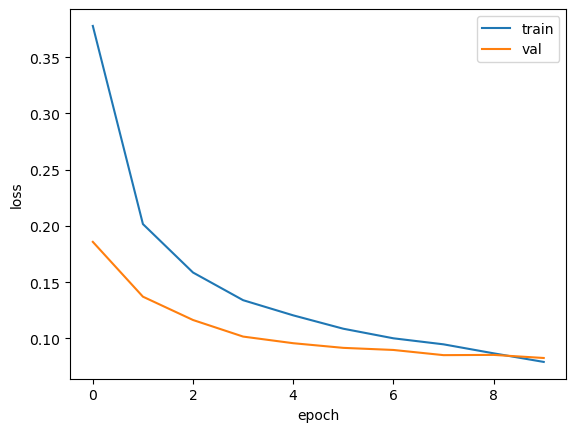

In [95]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('callback_early.jpg', dpi=300)
plt.show()